

#### PERFORMANCE ANALYSIS OF MACHINE LEARNING ALGORITHMS FOR MONITORING HUMAN ACTIVITY RECOGNITION 





### SVM Algorithm


The purpose of this thesis is to predict human behavior based upon wearable sensor data and Smartphone data and perform a comparative study of performance between multiple classification algorithms. We will be using publicly available UCI data set for this study. As this data is not derived from our experiment, so it becomes crucial to check the dataset for all the data quality issues. Otherwise, data quality issues can provide irrelevant results, so in order to prepare data for building models,

1. Data load
2. Standardization of the datset
3. Splitting of Original Dataset between test and train
4. Model Building

**** 1. Data Load***

***

In [58]:
### import all the required Library

import pandas as pd
import numpy as np
import glob
import missingno as msno 
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
## Load the data 
train_PCA=pd.read_csv("train_PCA.csv")
test_PCA=pd.read_csv("test_PCA.csv")

In [60]:
train_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Activity1
0,-0.274661,-0.014221,0.044239,-0.043133,0.093612,0.006072,0.011894,-0.047683,0.024477,0.064477,-0.034119,0.038833,0.016353,-0.008571,0.003092,0.062004,-0.000156,-0.038387,-0.043269,0.041373,0.008692,0.027369,0.050982,0.028853,-0.014689,0.011508,-0.033401,0.032933,-0.026441,0.008551,-0.035987,0.012583,0.004507,-0.015972,0.038392,0.046078,0.040539,0.028336,0.026281,0.037018,-0.011348,0.003330,0.019406,0.005486,-0.026264,0.011655,0.033542,-0.008183,0.009781,0.013815,0.012481,-0.004252,-0.021621,0.015006,-0.003950,-0.020456,0.028577,-0.013620,0.003256,0.025722,0.003476,0.019271,-0.006529,0.000688,0.038909,-0.009866,0.002480,0.005427,-0.001067,-0.019885,0.043633,-0.012862,0.000380,0.004127,-0.004338,-0.028773,-0.015501,0.017519,-0.001464,0.003374,0.017085,0.007951,-0.006456,0.024258,0.016655,0.006181,-0.010551,0.015108,-0.044432,-0.005050,-0.006040,-0.019431,0.012384,0.011890,-0.004268,-0.001342,-0.004520,-0.012564,-0.011136,-0.003355,2
1,-0.277445,-0.013528,0.075286,-0.044493,0.059074,-0.012129,-0.028058,-0.070941,-0.040506,0.005515,0.019618,0.003617,0.000491,-0.000978,0.005999,0.014719,0.009376,-0.007275,0.011551,0.018965,0.025083,-0.019999,0.002164,-0.000957,-0.011164,0.000095,0.008830,0.006933,-0.023700,0.008168,-0.000471,0.019618,0.007465,-0.014915,-0.003361,-0.000389,0.008019,-0.021659,-0.015120,-0.008717,-0.009571,-0.003329,0.000612,-0.006933,-0.008132,0.004103,-0.012858,0.010978,-0.005416,0.002607,0.007047,0.039159,-0.002286,0.004220,0.006152,0.010108,0.007082,0.000041,0.018919,-0.014621,-0.010717,0.016837,-0.007685,0.021927,0.020257,0.002386,-0.004992,0.020612,0.004928,0.006373,-0.004637,-0.012092,-0.013050,-0.002781,-0.015357,0.006871,-0.008909,-0.003557,-0.000273,0.006005,-0.003260,0.002502,0.011487,-0.010980,0.020125,-0.000890,-0.011546,-0.001568,-0.009222,-0.006182,0.005377,0.005618,0.003333,-0.001077,-0.000520,0.000789,-0.001109,-0.011614,-0.004807,-0.003336,2
2,-0.270402,-0.034001,0.085766,-0.051079,0.048369,-0.008830,-0.000419,-0.006987,0.005641,0.006085,0.002896,-0.009276,0.000367,0.004434,-0.012815,0.010714,0.015703,-0.012407,0.003433,0.025953,0.032635,-0.007642,-0.026303,-0.011711,-0.017659,-0.002648,-0.012679,-0.010985,-0.012905,-0.014821,-0.000207,-0.011357,-0.011176,0.010292,0.006904,0.017379,0.009074,-0.006242,-0.015641,-0.015824,0.005188,-0.012230,0.019329,0.008219,0.005662,-0.011074,-0.018449,0.027653,-0.012682,-0.001952,0.014450,0.015928,0.016743,-0.004326,-0.007706,0.015156,0.003118,0.013777,0.006313,-0.006293,0.011710,0.004641,0.002526,0.011145,-0.000523,0.005395,0.008207,0.011724,0.001704,0.001906,0.003188,0.004952,-0.002527,0.001770,0.003049,0.000971,0.010323,0.010285,-0.014410,-0.000749,0.002308,0.008825,0.000129,0.007141,0.002843,-0.002267,-0.001740,0.000866,0.007861,-0.021158,0.003544,-0.011966,0.004696,0.006441,-0.004917,-0.025895,-0.011609,0.005115,0.012374,-0.009798,2
3,-0.281278,-0.065050,0.082948,-0.028730,0.048044,0.019769,-0.031502,0.002595,-0.056688,0.011325,0.035018,0.003088,-0.026101,0.011246,-0.005696,-0.005237,-0.009797,0.018474,-0.012880,0.002075,-0.018158,-0.001192,-0.001285,-0.016176,0.027074,-0.013273,0.007924,-0.008436,-0.014339,-0.011164,-0.020490,-0.012300,-0.002067,0.027756,0.015368,0.011213,0.002699,0.010127,0.004029,0.013315,0.007186,-0.007147,-0.013140,-0.013131,0.001862,-0.015752,-0.013561,0.012332,-0.008560,0.003872,-0.001758,0.013961,0.003348,0.010028,0.008025,0.012444,0.014762,0.022530,0.004103,-0.003558,0.012718,0.006458,-0.013691,0.000772,-0.011497,0.001246,0.011456,0.017945,0.006431,-0.008430,0.000532,0.001957,-0.012831,0.006515,0.010813,0.003746,0.015315,0.017933,-0.012376,-0.005652,-0.003602,-0.004951,-0.000948,0.000676,-0.011045,-

**2. Divide between X and Y**

In [61]:
Output =['Activity1']
#Features=['Time_Sec', 'Acc_Front_axis', 'Acc_vert_axis', 'Acc_Lat_axis',
 #     'id_Antenna', 'RSSI', 'Phase', 'Freq']

In [62]:
X_train= train_PCA.drop(Output,1)
Y_train= train_PCA[Output]

X_test= test_PCA.drop(Output,1)
Y_test= test_PCA[Output]

In [64]:
## Print X after normalization
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.274661,-0.014221,0.044239,-0.043133,0.093612,0.006072,0.011894,-0.047683,0.024477,0.064477,-0.034119,0.038833,0.016353,-0.008571,0.003092,0.062004,-0.000156,-0.038387,-0.043269,0.041373,0.008692,0.027369,0.050982,0.028853,-0.014689,0.011508,-0.033401,0.032933,-0.026441,0.008551,-0.035987,0.012583,0.004507,-0.015972,0.038392,0.046078,0.040539,0.028336,0.026281,0.037018,-0.011348,0.003330,0.019406,0.005486,-0.026264,0.011655,0.033542,-0.008183,0.009781,0.013815,1.248128e-02,-0.004252,-0.021621,0.015006,-0.003950,-0.020456,0.028577,-0.013620,0.003256,0.025722,0.003476,0.019271,-0.006529,0.000688,0.038909,-0.009866,0.002480,0.005427,-0.001067,-0.019885,0.043633,-0.012862,0.000380,0.004127,-0.004338,-0.028773,-0.015501,0.017519,-0.001464,0.003374,1.708487e-02,0.007951,-0.006456,0.024258,0.016655,0.006181,-0.010551,0.015108,-0.044432,-0.005050,-0.006040,-0.019431,0.012384,0.011890,-0.004268,-0.001342,-0.004520,-0.012564,-0.011136,-0.003355
1,-0.277445,-0.013528,0.075286,-0.044493,0.059074,-0.012129,-0.028058,-0.070941,-0.040506,0.005515,0.019618,0.003617,0.000491,-0.000978,0.005999,0.014719,0.009376,-0.007275,0.011551,0.018965,0.025083,-0.019999,0.002164,-0.000957,-0.011164,0.000095,0.008830,0.006933,-0.023700,0.008168,-0.000471,0.019618,0.007465,-0.014915,-0.003361,-0.000389,0.008019,-0.021659,-0.015120,-0.008717,-0.009571,-0.003329,0.000612,-0.006933,-0.008132,0.004103,-0.012858,0.010978,-0.005416,0.002607,7.047303e-03,0.039159,-0.002286,0.004220,0.006152,0.010108,0.007082,0.000041,0.018919,-0.014621,-0.010717,0.016837,-0.007685,0.021927,0.020257,0.002386,-0.004992,0.020612,0.004928,0.006373,-0.004637,-0.012092,-0.013050,-0.002781,-0.015357,0.006871,-0.008909,-0.003557,-0.000273,0.006005,-3.259778e-03,0.002502,0.011487,-0.010980,0.020125,-0.000890,-0.011546,-0.001568,-0.009222,-0.006182,0.005377,0.005618,0.003333,-0.001077,-0.000520,0.000789,-0.001109,-0.011614,-0.004807,-0.003336
2,-0.270402,-0.034001,0.085766,-0.051079,0.048369,-0.008830,-0.000419,-0.006987,0.005641,0.006085,0.002896,-0.009276,0.000367,0.004434,-0.012815,0.010714,0.015703,-0.012407,0.003433,0.025953,0.032635,-0.007642,-0.026303,-0.011711,-0.017659,-0.002648,-0.012679,-0.010985,-0.012905,-0.014821,-0.000207,-0.011357,-0.011176,0.010292,0.006904,0.017379,0.009074,-0.006242,-0.015641,-0.015824,0.005188,-0.012230,0.019329,0.008219,0.005662,-0.011074,-0.018449,0.027653,-0.012682,-0.001952,1.445023e-02,0.015928,0.016743,-0.004326,-0.007706,0.015156,0.003118,0.013777,0.006313,-0.006293,0.011710,0.004641,0.002526,0.011145,-0.000523,0.005395,0.008207,0.011724,0.001704,0.001906,0.003188,0.004952,-0.002527,0.001770,0.003049,0.000971,0.010323,0.010285,-0.014410,-0.000749,2.308257e-03,0.008825,0.000129,0.007141,0.002843,-0.002267,-0.001740,0.000866,0.007861,-0.021158,0.003544,-0.011966,0.004696,0.006441,-0.004917,-0.025895,-0.011609,0.005115,0.012374,-0.009798
3,-0.281278,-0.065050,0.082948,-0.028730,0.048044,0.019769,-0.031502,0.002595,-0.056688,0.011325,0.035018,0.003088,-0.026101,0.011246,-0.005696,-0.005237,-0.009797,0.018474,-0.012880,0.002075,-0.018158,-0.001192,-0.001285,-0.016176,0.027074,-0.013273,0.007924,-0.008436,-0.014339,-0.011164,-0.020490,-0.012300,-0.002067,0.027756,0.015368,0.011213,0.002699,0.010127,0.004029,0.013315,0.007186,-0.007147,-0.013140,-0.013131,0.001862,-0.015752,-0.013561,0.012332,-0.008560,0.003872,-1.757643e-03,0.013961,0.003348,0.010028,0.008025,0.012444,0.014762,0.022530,0.004103,-0.003558,0.012718,0.006458,-0.013691,0.000772,-0.011497,0.001246,0.011456,0.017945,0.006431,-0.008430,0.000532,0.001957,-0.012831,0.006515,0.010813,0.003746,0.015315,0.017933,-0.012376,-0.005652,-3.601639e-03,-0.004951,-0.000948,0.00

In [72]:
Model_Name="SVM Classifier"

#### 4. Model build & Evaluation 

- *We will be buidling below model and do the comparison between these model* 

1. Logistics Regression
2. KNN Classification Algorithm
3. SVM Algorithm
4. Random Forest
5. GBM
5. Deep Neural Network

**1.SVM CLassification Hyper tunning parameter**

In [14]:
import time


In [81]:
### ## hypertune Parameter for SVM
#n_neighbors=list(range(1, 10))
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10,100,200,300,400,500,600,1000]}

svc = SVC()


start_time=time.time()
# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
grid = GridSearchCV(estimator = svc, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                       return_train_score=True)   
  
grid_result =grid.fit(X_train,Y_train)







Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.3min finished


In [82]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.928183 using {'C': 1000}
Execution time: 290.42899775505066 ms


In [103]:
cv_results = pd.DataFrame(grid_result.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.398384,0.334528,2.968629,0.110637,0.1,{'C': 0.1},0.191272,0.191272,0.191585,0.191376,0.000147,10,0.191429,0.191429,0.191272,0.191377,0.000074
1,6.520245,0.288663,2.909052,0.174674,1,{'C': 1},0.567292,0.553834,0.527369,0.549510,0.016581,9,0.584694,0.537143,0.564845,0.562227,0.019501
2,2.771925,0.190195,2.354248,0.024639,10,{'C': 10},0.888662,0.867863,0.885621,0.880713,0.009174,8,0.906327,0.911224,0.895595,0.904382,0.006527
3,1.063644,0.104433,1.081738,0.110572,100,{'C': 100},0.923328,0.884176,0.928513,0.911997,0.019794,7,0.952449,0.965918,0.949429,0.955932,0.007168
4,0.853909,0.043956,0.923407,0.015341,200,{'C': 200},0.926591,0.894780,0.936683,0.919342,0.017857,6,0.967551,0.974286,0.962887,0.968241,0.004679
5,0.743454,0.051841,0.766442,0.033435,300,{'C': 300},0.927406,0.897227,0.942810,0.922470,0.018932,5,0.970000,0.976122,0.967985,0.971369,0.003460
6,0.674903,0.092763,0.683031,0.042970,400,{'C': 400},0.931485,0.898450,0.942402,0.924102,0.018685,4,0.971837,0.977755,0.970840,0.973477,0.003052
7,0.727088,0.049964,0.712381,0.019889,500,{'C': 500},0.932708,0.897227,0.945261,0.925054,0.020341,3,0.974490,0.978163,0.973491,0.975381,0.002009
8,0.606391,0.015998,0.631948,0.051150,600,{'C': 600},0.933116,0.900897,0.946487,0.926823,0.019134,2,0.975918,0.978571,0.974918,0.976469,0.001541
9,0.644286,0.067721,0.592000,0.043138,1000,{'C': 1000},0.931485,0.905383,0.947712,0.928183,0.017436,1,0.979184,0.980816,0.979405,0.979802,0.000723


In [104]:
k=cv_results[['param_C','mean_test_score','mean_train_score']]
File_Name=Model_Name+'_Hypertune.csv'
k.to_csv(File_Name,index=False)

Text(0.5, 0, 'param_C')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and C')

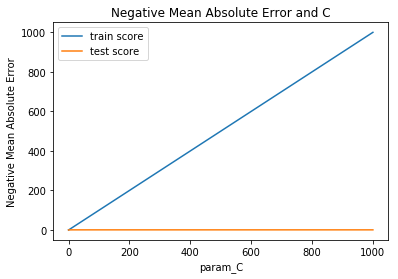

In [105]:
# plotting mean test and train scoes with alpha 


# plotting
plt.plot(cv_results['param_C'], cv_results['param_C'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('param_C')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and C")
plt.legend(['train score', 'test score'], loc='upper left')
#plt.show()
File_Name=Model_Name+'_HyperTune.png'
plt.savefig(File_Name)

In [155]:
#SVM
import time
start_time = time.time()
Model1 = SVC(kernel='rbf',C=1000,probability=True)



In [156]:
#fit model on Train data 
Model1.fit(X_train,Y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [157]:
Model1_duration=time.time()-start_time

In [158]:
Model1_duration

6.5602476596832275

In [159]:
#Y = label_binarize(Y, classes=[1, 2, 3,4])
#n_classes = Y.shape[1]

In [160]:
## Predict train score for training data  
Y_train_pred=grid.predict(X_train)

In [161]:
Y_test_pred=grid.predict(X_test)

In [162]:
accuracy_score(Y_test,Y_test_pred)

0.6335256192738378

In [163]:
## Confusion matrix for Logistics regression
cm_Model = metrics.confusion_matrix(Y_test,Y_test_pred,labels=[0, 1, 2,3,4,5])
print(cm_Model)

[[446  89   2   0   0   0]
 [ 34 346 111   0   0   0]
 [ 11 279 238   0   0   4]
 [  0   0   0 322  64 110]
 [  0   0   0 113 198 109]
 [  0   0   0  90  64 317]]


In [164]:
#cm_logreg = pd.DataFrame(cm_logreg, index=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"], columns=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"])

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'Actual label')

Text(0.5, 0, 'Predicted label')

Text(0.5, 1.05, 'Accuracy Score: 0.6335256192738378')

<Figure size 720x720 with 0 Axes>

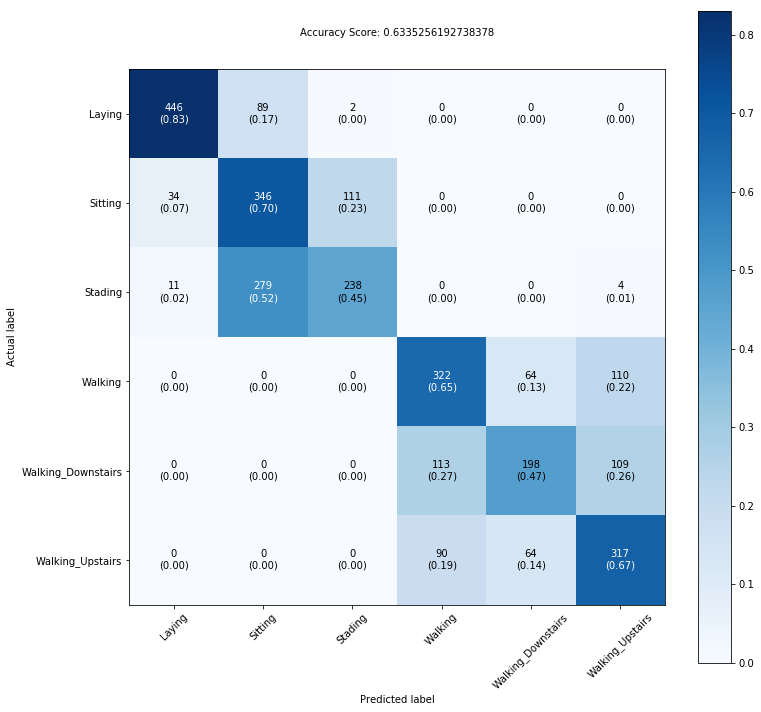

In [165]:
from mlxtend.plotting import plot_confusion_matrix

plt.figure(figsize=(10,10))
class_names=["Laying","Sitting","Stading","Walking","Walking_Downstairs","Walking_Upstairs"]
ax = plot_confusion_matrix(cm_Model,
                                colorbar=True,show_normed=True ,class_names=class_names,figsize=(12,12))
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Model1.score(X_test, Y_test))
plt.title(all_sample_title, size = 10);

File_Name=Model_Name+'_Confusion.png'
#plt.show()
plt.savefig(File_Name)



**precision**

 >The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
 
**Recall** 
 >The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

**F-beta score**
 >The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.


In [166]:
from sklearn.metrics import classification_report
classificationReport = classification_report(Y_test, Y_test_pred, target_names=class_names,output_dict=True)

In [167]:
print(classificationReport)


{'Laying': {'precision': 0.9083503054989817, 'recall': 0.8305400372439479, 'f1-score': 0.8677042801556419, 'support': 537}, 'Sitting': {'precision': 0.484593837535014, 'recall': 0.7046843177189409, 'f1-score': 0.5742738589211619, 'support': 491}, 'Stading': {'precision': 0.6780626780626781, 'recall': 0.4473684210526316, 'f1-score': 0.5390713476783693, 'support': 532}, 'Walking': {'precision': 0.6133333333333333, 'recall': 0.6491935483870968, 'f1-score': 0.6307541625857003, 'support': 496}, 'Walking_Downstairs': {'precision': 0.6073619631901841, 'recall': 0.4714285714285714, 'f1-score': 0.5308310991957105, 'support': 420}, 'Walking_Upstairs': {'precision': 0.587037037037037, 'recall': 0.673036093418259, 'f1-score': 0.6271018793273985, 'support': 471}, 'micro avg': {'precision': 0.6335256192738378, 'recall': 0.6335256192738378, 'f1-score': 0.6335256192738378, 'support': 2947}, 'macro avg': {'precision': 0.6464565257762047, 'recall': 0.629375164874908, 'f1-score': 0.6282894379773304, 'sup

In [168]:
df_performance=pd.DataFrame(classificationReport)
df_performance=df_performance.reset_index()
print(df_performance)

       index      Laying     Sitting     Stading     Walking  \
0   f1-score    0.867704    0.574274    0.539071    0.630754   
1  precision    0.908350    0.484594    0.678063    0.613333   
2     recall    0.830540    0.704684    0.447368    0.649194   
3    support  537.000000  491.000000  532.000000  496.000000   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.633526     0.628289   
1            0.607362          0.587037     0.633526     0.646457   
2            0.471429          0.673036     0.633526     0.629375   
3          420.000000        471.000000  2947.000000  2947.000000   

   weighted avg  
0      0.633145  
1      0.652273  
2      0.633526  
3   2947.000000  


In [169]:
print(df_performance.head())

       index      Laying     Sitting     Stading     Walking  \
0   f1-score    0.867704    0.574274    0.539071    0.630754   
1  precision    0.908350    0.484594    0.678063    0.613333   
2     recall    0.830540    0.704684    0.447368    0.649194   
3    support  537.000000  491.000000  532.000000  496.000000   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.633526     0.628289   
1            0.607362          0.587037     0.633526     0.646457   
2            0.471429          0.673036     0.633526     0.629375   
3          420.000000        471.000000  2947.000000  2947.000000   

   weighted avg  
0      0.633145  
1      0.652273  
2      0.633526  
3   2947.000000  


In [170]:
#Logistics_df
df_performance.rename(columns={'index':'Perfomance Matrix'}, inplace=True)
df_performance

,Perfomance Matrix,Laying,Sitting,Stading,Walking,Walking_Downstairs,Walking_Upstairs,micro avg,macro avg,weighted avg
0,f1-score,0.867704,0.574274,0.539071,0.630754,0.530831,0.627102,0.633526,0.628289,0.633145
1,precision,0.908350,0.484594,0.678063,0.613333,0.607362,0.587037,0.633526,0.646457,0.652273
2,recall,0.830540,0.704684,0.447368,0.649194,0.471429,0.673036,0.633526,0.629375,0.633526
3,support,537.000000,491.000000,532.000000,496.000000,420.000000,471.000000,2947.000000,2947.000000,2947.000000


In [171]:
df_performance=df_performance.append({'Perfomance Matrix':"Training Accuracy" ,'macro avg' :Model1.score(X_train, Y_train) },ignore_index = True)
print(df_performance)    

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.867704    0.574274    0.539071    0.630754   
1          precision    0.908350    0.484594    0.678063    0.613333   
2             recall    0.830540    0.704684    0.447368    0.649194   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.633526     0.628289   
1            0.607362          0.587037     0.633526     0.646457   
2            0.471429          0.673036     0.633526     0.629375   
3          420.000000        471.000000  2947.000000  2947.000000   
4                 NaN               NaN          NaN     0.978101   

   weighted avg  
0      0.633145  
1      0.652273  
2      0.633526  
3   2947.000000  
4           NaN  


In [172]:
df_performance=df_performance.append({'Perfomance Matrix':"Test Accuracy" ,'macro avg' :Model1.score(X_test, Y_test) },ignore_index = True)
print(df_performance)    

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.867704    0.574274    0.539071    0.630754   
1          precision    0.908350    0.484594    0.678063    0.613333   
2             recall    0.830540    0.704684    0.447368    0.649194   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   
5      Test Accuracy         NaN         NaN         NaN         NaN   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.633526     0.628289   
1            0.607362          0.587037     0.633526     0.646457   
2            0.471429          0.673036     0.633526     0.629375   
3          420.000000        471.000000  2947.000000  2947.000000   
4                 NaN               NaN          NaN     0.978101   
5                 NaN               NaN          NaN     0.633526   

   weighted

In [173]:
df_performance=df_performance.append({'Perfomance Matrix':"Model_Time" ,'macro avg' :Model1_duration },ignore_index = True)
print(df_performance)

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.867704    0.574274    0.539071    0.630754   
1          precision    0.908350    0.484594    0.678063    0.613333   
2             recall    0.830540    0.704684    0.447368    0.649194   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   
5      Test Accuracy         NaN         NaN         NaN         NaN   
6         Model_Time         NaN         NaN         NaN         NaN   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.633526     0.628289   
1            0.607362          0.587037     0.633526     0.646457   
2            0.471429          0.673036     0.633526     0.629375   
3          420.000000        471.000000  2947.000000  2947.000000   
4                 NaN               NaN          NaN     0.978101   
5        

In [174]:
## Check False Positive/Negative True Postive/Negative

FP = cm_Model.sum(axis=0) - np.diag(cm_Model)  
FN = cm_Model.sum(axis=1) - np.diag(cm_Model)
TP = np.diag(cm_Model)
TN = cm_Model.sum() - (FP + FN + TP)

print(FP,FN,TP,TN)

[ 45 368 113 203 128 223] [ 91 145 294 174 222 154] [446 346 238 322 198 317] [2365 2088 2302 2248 2399 2253]


In [175]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [176]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
print(FDR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

PLR = TPR/(1-TNR)
print(PLR)


NLR =TNR/(1-TPR)
print(NLR)

OMR=(FP+FN)/(TP+FN+FP+TN)
print(OMR)

NNE=1/PPV

print(NNE)

[0.83054004 0.70468432 0.44736842 0.64919355 0.47142857 0.67303609]
[0.9813278  0.85016287 0.95320911 0.91717666 0.94934705 0.90993538]
[0.90835031 0.48459384 0.67806268 0.61333333 0.60736196 0.58703704]
[0.96294788 0.93506494 0.88674884 0.92815855 0.9152995  0.93601994]
[0.0186722  0.14983713 0.04679089 0.08282334 0.05065295 0.09006462]
[0.16945996 0.29531568 0.55263158 0.35080645 0.52857143 0.32696391]
[0.09164969 0.51540616 0.32193732 0.38666667 0.39263804 0.41296296]
[0.95385137 0.82592467 0.86189345 0.87207329 0.88123515 0.87207329]
[44.48003311  4.70300186  9.56101537  7.83829255  9.30703125  7.47281331]
[5.79091241 2.87882736 1.72485458 2.6144806  1.79606199 2.78298418]
[0.04614863 0.17407533 0.13810655 0.12792671 0.11876485 0.12792671]
[1.10089686 2.06358382 1.47478992 1.63043478 1.64646465 1.70347003]


In [177]:
df_performance.columns

Index(['Perfomance Matrix', 'Laying', 'Sitting', 'Stading', 'Walking',
       'Walking_Downstairs', 'Walking_Upstairs', 'micro avg', 'macro avg',
       'weighted avg'],
      dtype='object')

In [178]:
df_performance=df_performance.append({'Perfomance Matrix':"Specificty",'Laying':TNR[0],'Sitting':TNR[1],'Stading':TNR[2],'Walking':TNR[3],'Walking_Downstairs':TNR[4],'Walking_Upstairs':TNR[5]},ignore_index = True)
print(df_performance)

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.867704    0.574274    0.539071    0.630754   
1          precision    0.908350    0.484594    0.678063    0.613333   
2             recall    0.830540    0.704684    0.447368    0.649194   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   
5      Test Accuracy         NaN         NaN         NaN         NaN   
6         Model_Time         NaN         NaN         NaN         NaN   
7         Specificty    0.981328    0.850163    0.953209    0.917177   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.633526     0.628289   
1            0.607362          0.587037     0.633526     0.646457   
2            0.471429          0.673036     0.633526     0.629375   
3          420.000000        471.000000  2947.000000  2947.000000   
4     

In [179]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative predictive value" ,'Laying':NPV[0],'Sitting':NPV[1],'Stading': NPV[2],'Walking':NPV[3],'Walking_Downstairs':NPV[4],'Walking_Upstairs':NPV[5]},ignore_index = True)
print(df_performance)

           Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0                   f1-score    0.867704    0.574274    0.539071    0.630754   
1                  precision    0.908350    0.484594    0.678063    0.613333   
2                     recall    0.830540    0.704684    0.447368    0.649194   
3                    support  537.000000  491.000000  532.000000  496.000000   
4          Training Accuracy         NaN         NaN         NaN         NaN   
5              Test Accuracy         NaN         NaN         NaN         NaN   
6                 Model_Time         NaN         NaN         NaN         NaN   
7                 Specificty    0.981328    0.850163    0.953209    0.917177   
8  Negative predictive value    0.962948    0.935065    0.886749    0.928159   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.633526     0.628289   
1            0.607362          0.587037     0.633526     0.64

In [180]:
df_performance=df_performance.append({'Perfomance Matrix':"Positive Likelihood Ratio" ,
'Laying':PLR[0],'Sitting':PLR[1],'Stading':PLR[2],'Walking':PLR[3],'Walking_Downstairs':PLR[4],'Walking_Upstairs':PLR[5]},ignore_index = True)
print(df_performance)

           Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0                   f1-score    0.867704    0.574274    0.539071    0.630754   
1                  precision    0.908350    0.484594    0.678063    0.613333   
2                     recall    0.830540    0.704684    0.447368    0.649194   
3                    support  537.000000  491.000000  532.000000  496.000000   
4          Training Accuracy         NaN         NaN         NaN         NaN   
5              Test Accuracy         NaN         NaN         NaN         NaN   
6                 Model_Time         NaN         NaN         NaN         NaN   
7                 Specificty    0.981328    0.850163    0.953209    0.917177   
8  Negative predictive value    0.962948    0.935065    0.886749    0.928159   
9  Positive Likelihood Ratio   44.480033    4.703002    9.561015    7.838293   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.530831          0.627102     0.6335

In [181]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative Likelihood Ratio" ,
'Laying':NLR[0],'Sitting':NLR[1],'Stading':NLR[2],'Walking':NLR[3],'Walking_Downstairs':NLR[4],'Walking_Upstairs':NLR[5]},ignore_index = True)
print(df_performance)

            Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0                    f1-score    0.867704    0.574274    0.539071    0.630754   
1                   precision    0.908350    0.484594    0.678063    0.613333   
2                      recall    0.830540    0.704684    0.447368    0.649194   
3                     support  537.000000  491.000000  532.000000  496.000000   
4           Training Accuracy         NaN         NaN         NaN         NaN   
5               Test Accuracy         NaN         NaN         NaN         NaN   
6                  Model_Time         NaN         NaN         NaN         NaN   
7                  Specificty    0.981328    0.850163    0.953209    0.917177   
8   Negative predictive value    0.962948    0.935065    0.886749    0.928159   
9   Positive Likelihood Ratio   44.480033    4.703002    9.561015    7.838293   
10  Negative Likelihood Ratio    5.790912    2.878827    1.724855    2.614481   

    Walking_Downstairs  Wal

In [182]:
df_performance=df_performance.append({'Perfomance Matrix':"Overall Misclassification Ratio" ,
'Laying':OMR[0],'Sitting':OMR[1],'Stading':OMR[2],'Walking':OMR[3],'Walking_Downstairs':OMR[4],'Walking_Upstairs':OMR[5]},ignore_index = True)
print(df_performance)

                  Perfomance Matrix      Laying     Sitting     Stading  \
0                          f1-score    0.867704    0.574274    0.539071   
1                         precision    0.908350    0.484594    0.678063   
2                            recall    0.830540    0.704684    0.447368   
3                           support  537.000000  491.000000  532.000000   
4                 Training Accuracy         NaN         NaN         NaN   
5                     Test Accuracy         NaN         NaN         NaN   
6                        Model_Time         NaN         NaN         NaN   
7                        Specificty    0.981328    0.850163    0.953209   
8         Negative predictive value    0.962948    0.935065    0.886749   
9         Positive Likelihood Ratio   44.480033    4.703002    9.561015   
10        Negative Likelihood Ratio    5.790912    2.878827    1.724855   
11  Overall Misclassification Ratio    0.046149    0.174075    0.138107   

       Walking  Walking_

In [183]:
from sklearn.preprocessing import label_binarize
#y = label_binarize(Y, classes=[1, 2, 3,4])
y_test=label_binarize(Y_test, classes=[1, 2, 3,4,5,6])
n_classes = Y_test.shape[1]

In [184]:
y_test

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

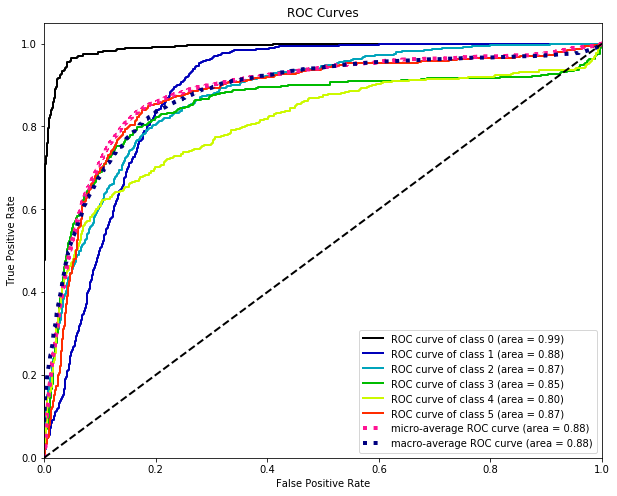

In [185]:
import scikitplot as skplt
y_probas = Model1.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
File_Name=Model_Name+'_ROC.png'
plt.savefig(File_Name)

In [186]:
from sklearn.metrics import roc_auc_score
#auc = roc_auc_score(y_test, y_probas)

In [187]:
df_performance.columns

Index(['Perfomance Matrix', 'Laying', 'Sitting', 'Stading', 'Walking',
       'Walking_Downstairs', 'Walking_Upstairs', 'micro avg', 'macro avg',
       'weighted avg'],
      dtype='object')

In [188]:
df_performance=df_performance.append({'Perfomance Matrix':"ROC curve_Avergae" ,'macro avg':0.88},ignore_index = True)
print(df_performance)

                  Perfomance Matrix      Laying     Sitting     Stading  \
0                          f1-score    0.867704    0.574274    0.539071   
1                         precision    0.908350    0.484594    0.678063   
2                            recall    0.830540    0.704684    0.447368   
3                           support  537.000000  491.000000  532.000000   
4                 Training Accuracy         NaN         NaN         NaN   
5                     Test Accuracy         NaN         NaN         NaN   
6                        Model_Time         NaN         NaN         NaN   
7                        Specificty    0.981328    0.850163    0.953209   
8         Negative predictive value    0.962948    0.935065    0.886749   
9         Positive Likelihood Ratio   44.480033    4.703002    9.561015   
10        Negative Likelihood Ratio    5.790912    2.878827    1.724855   
11  Overall Misclassification Ratio    0.046149    0.174075    0.138107   
12                ROC cur

In [189]:
df_performance

,Perfomance Matrix,Laying,Sitting,Stading,Walking,Walking_Downstairs,Walking_Upstairs,micro avg,macro avg,weighted avg
0,f1-score,0.867704,0.574274,0.539071,0.630754,0.530831,0.627102,0.633526,0.628289,0.633145
1,precision,0.908350,0.484594,0.678063,0.613333,0.607362,0.587037,0.633526,0.646457,0.652273
2,recall,0.830540,0.704684,0.447368,0.649194,0.471429,0.673036,0.633526,0.629375,0.633526
3,support,537.000000,491.000000,532.000000,496.000000,420.000000,471.000000,2947.000000,2947.000000,2947.000000
4,Training Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.978101,NaN
5,Test Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633526,NaN
6,Model_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.560248,NaN
7,Specificty,0.981328,0.850163,0.953209,0.917177,0.949347,0.909935,NaN,NaN,NaN
8,Negative predictive value,0.962948,0.935065,0.886749,0.928159,0.915300,0.936020,NaN,NaN,NaN
9,Positive Likelihood Ratio,44.480033,4.703002,9.561015,7.838293,9.307031,7.472813,NaN,NaN,NaN


In [190]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_probas[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_probas[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
   y_probas.ravel())
average_precision["micro"] = average_precision_score(y_test, y_probas,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.15


In [191]:
df_performance['Model1']="SVM_Classification"

In [192]:
df_performance['Data Type']= "SmartPhone Sensor Data"

File_Name=Model_Name + '.csv'
df_performance.to_csv(File_Name,index=False)